# Выявление зависимостей между кол-ными и категорийными переменными
Выявление зависимостей между переменными играет очень важную роль в анализе данных

У нас есть набор данных хранящиеся в csv файле students.csv

Колонки:
- school - наименование школы в которую ходит студент
    - GP - Gabriel Periera
    - MS - Mousinho da Silveria
- address - местоположение дома студента
    - U - Urban
    - R - Rural
- absences - кол-во пропущенных дней в течении года
- Mjob - сфера работы матери
- Fjob - сфера работы отца
- G3 - итоговая оценка по математике, от 0 до 20

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd

# Запишем данные из файла в переменную
students = pd.read_csv('students.csv')

In [2]:
# По обычаю посмотрим несколько строк данных из набора данных
print(students.head())

  school address  absences     Mjob      Fjob  G3
0     GP       U         6  at_home   teacher   6
1     GP       U         4  at_home     other   6
2     GP       U        10  at_home     other  10
3     GP       U         2   health  services  15
4     GP       U         4    other     other  10


In [4]:
# Для выявления зависимости для начала следует разделить набор данных на массивы в разерезе категорий
# В нащем наборе данных попробуем найти зависимость между метом проживания и итоговой оценкой
scores_rural = students.G3[students.address == 'R']
scores_urban = students.G3[students.address == 'U']

In [ ]:
# Для начала рассчитаем показатели: mean и median для каждой группы и сравним их
mean_scores_rural = scores_rural.mean()
mean_scores_urban = scores_urban.mean()
print('MEAN')
print(mean_scores_rural)
print(mean_scores_urban)
print(mean_scores_rural - mean_scores_urban)

print('MEDIAN')
median_scores_rural = scores_rural.median()
median_scores_urban = scores_urban.median()
print(median_scores_rural)
print(median_scores_urban)
print(median_scores_rural - median_scores_urban)

MEAN
9.511363636363637
10.674267100977199
-1.1629034646135619
MEDIAN
10.0
11.0
-1.0


## Анализ полученных результатов
Судя по полученным данным можем сказать что итоговые оценки по математике ни как не зависят от место жительства студента так как:
- Разница между средними значениями не велика
- Разница между медианами не велика

Сильно зависимые показатели имеют большую разницу в данных значениях

## Визуализация показателей для нахождения зависимостей
Давайте попробуем визуально представить данные и понять есть ли зависимость оценки от места жительства

Для визуализации таких сравнений используют коробочную диаграмму типа **Side-by-Side**

Далее расмотрим как такие диаграммы строить

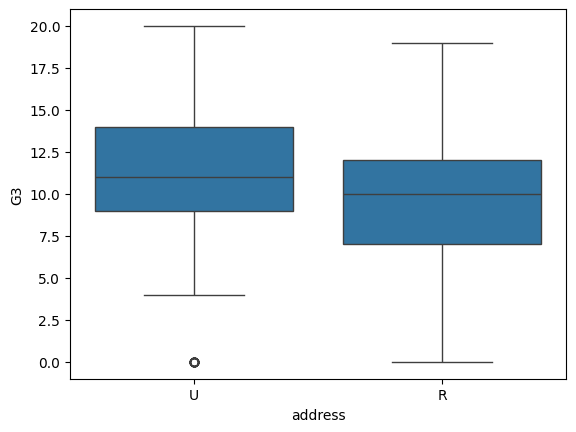

In [ ]:
# Для визуализации используется тот же метод как при обычном построении коробочной диаграммы
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=students, x = 'address', y = 'G3')
plt.show()
plt.close()
# Для построения side-by-side коробочной диаграммы в метод boxplot библиотеки передается несколько аргументов
# Данные откуда будут браться значения
# наименование колонки по оси Х (категорийная переменная)
# наименование колонки по оси Y (числовая переменная)
# Типы данных колонок могут отличаться в случае если мы хотим построить коробочную диаграмму по горизонтали 
# В следующем блоке кода продемонстрирована такая возможность

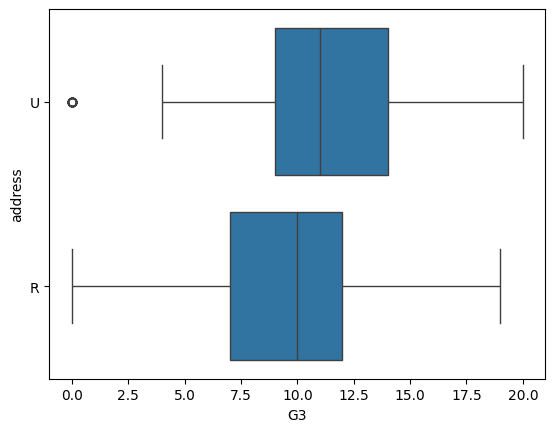

In [8]:
sns.boxplot(data=students, y = 'address', x = 'G3')
plt.show()
plt.close()

## Анализ диаграмм
Судя по диаграммам можно сказать что зависимости место жительства и итоговой оценки нет так как можно заметить
- явное пересечение значений
- близкое расположение средних линий

Чем больше пересечений значений в диаграмме тем менее зависимы числовые данные от выбранных категорийных данных

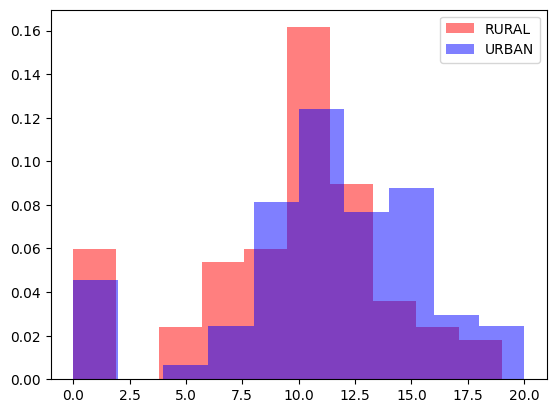

In [ ]:
# Данные также можно представить ввиде гистограм и анализируя пересечения их значений делать анализ
# Для построения перекрывающихся гистограм (Overlapping) используется метод библиотеки matplotlib.pyplot

# Добавляем две гистограммы путем последовательного вызова метода для различных массивов
plt.hist(scores_rural, color='red', label = 'RURAL', density=True, alpha = 0.5)
plt.hist(scores_urban, color='blue', label = 'URBAN', density=True, alpha = 0.5)
# Обязательно указываем разные цвет и указываем наименования (label)
# Параметр density отвечает за использование плотности в графикам а не частоте появляения занчений в наборе
# Параметр alpha отвечает за прозрачность графиков
plt.legend()
plt.show()

## Результат анализа наложенной гистограммы
Как мы можем заметить из полученной гистограммы у двух значений имеются очень много пересечений и наложений (хоть и значений наивысших оценок у студентов из города (URBAN) больше по плотности) что говорит о
- независимости данных от выбранных значений категорий
- зависимость отобразилась бы как большое кол-во чистых графиков (без наложений)

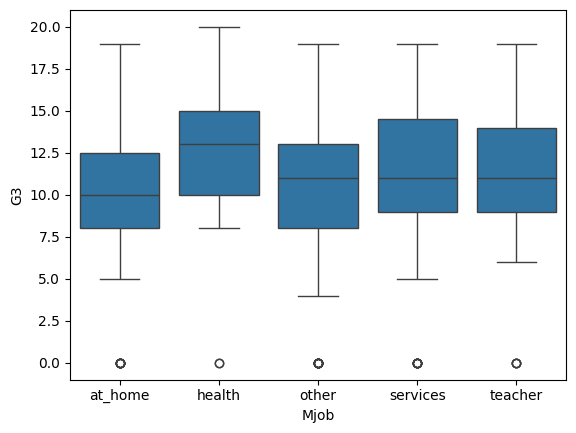

In [11]:
# Для эксперимента давайте посмотрим зависят ли оценки студентов от сферы работы матери
sns.boxplot(data=students, x = 'Mjob', y = 'G3')
plt.show()
plt.close()